In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Pull VIX historical data
ticker = "^VIX"

vix_history = yf.download(ticker, start='2018-01-01',progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.to_csv('resources/vix.csv')
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-01,16.41,16.620001,15.530000,16.080000,16.080000,0.0
2023-05-02,16.27,19.809999,16.260000,17.780001,17.780001,0.0
2023-05-03,17.82,18.830000,17.190001,18.340000,18.340000,0.0
2023-05-04,19.17,21.330000,18.670000,20.090000,20.090000,0.0
2023-05-05,19.50,19.629999,16.690001,17.190001,17.190001,0.0


In [3]:
# Pull S&P 500 historical data
ticker = "^GSPC" 

sp_history = yf.download(ticker, start='2018-01-01',progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-01,4166.790039,4186.919922,4164.120117,4167.870117,4167.870117,3.321370e+09
2023-05-02,4164.100098,4164.100098,4089.719971,4119.580078,4119.580078,4.486130e+09
2023-05-03,4122.250000,4148.299805,4088.860107,4090.750000,4090.750000,4.246510e+09
2023-05-04,4082.550049,4082.610107,4048.280029,4061.219971,4061.219971,4.920090e+09
2023-05-05,4084.729980,4147.020020,4084.729980,4136.250000,4136.250000,4.186270e+09


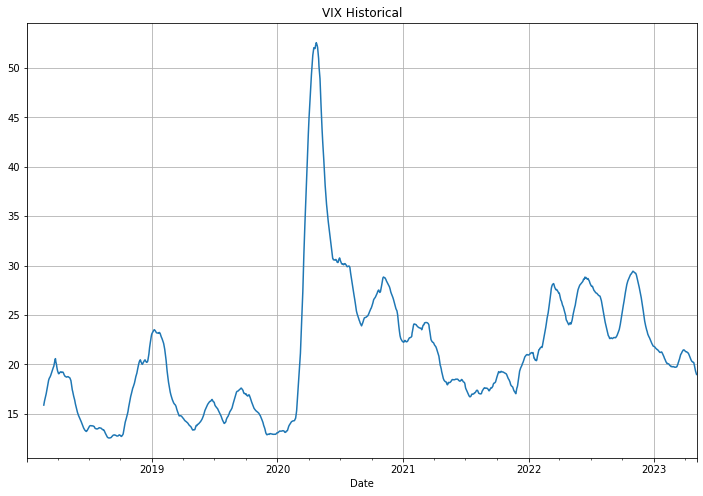

In [4]:
#Plot VIX 50-day rolling average
vix_plot = vix_history['Adj Close'].rolling(window=50).mean().plot(figsize=(12,8), title='VIX Historical', grid=True)

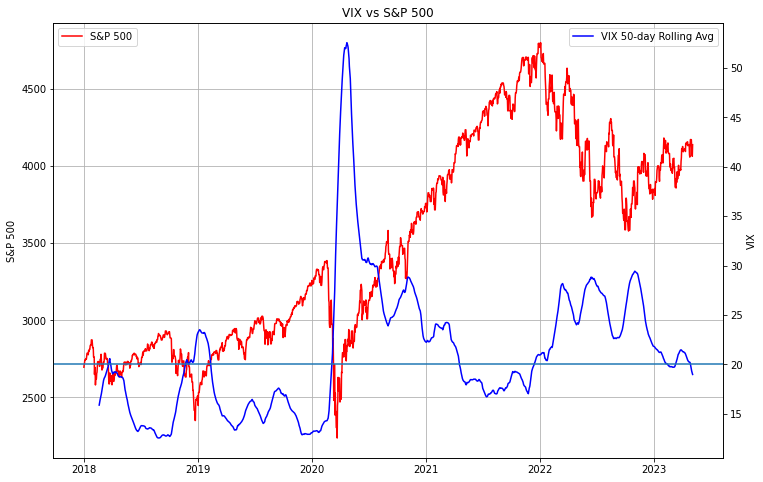

In [5]:
# Compare VIX to S&P Index and locate points where VIX crosses y value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label='VIX 50-day Rolling Avg', color='b')
ax2.set_title('VIX vs S&P 500')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)